## Telec Churn Analysis

### Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

### Data Collection & Analysis

In [2]:
# load the  customer data from csv file to a pandas dataframe
customer_data=pd.read_csv(r"D:\Dss Capstone Project\Customer_Data.csv")

In [3]:
# Display the first few rows of the customer dataset and its shape
print(customer_data.head())
print("Shape of the dataset:", customer_data.shape)

   customerID  gender SeniorCitizen Partner Dependents  Day  year  month  \
0  7590-VHVEG  Female            No     Yes         No   29  1998      1   
1  5575-GNVDE    Male            No      No         No   12  1983      9   
2  3668-QPYBK    Male            No      No         No   15  1996      5   
3  7795-CFOCW    Male            No      No         No   19  2001      2   
4  9237-HQITU  Female            No      No         No   23  1980     12   

          DOB  Age  
0  29-01-1998   27  
1  12-09-1983   41  
2  15-05-1996   28  
3  19-02-2001   24  
4  23-12-1980   44  
Shape of the dataset: (7043, 10)


In [5]:
# load the churn data from csv file to a pandas dataframe
churn_data=pd.read_csv(r"D:\Dss Capstone Project\Churn_Data.csv")

In [6]:
# Display the first few rows of the churn dataset and its shape
print(churn_data.head())
print("Shape of the dataset:", churn_data.shape)

   customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn  
0           Electronic check           29.85         29.85    No  
1               Mailed check           56.95       1889.50    No  
2               Mailed check           53.85        108.15   Yes  
3  Bank transfer (automatic)           42.30       1840.75    No  
4           Electronic check           70.70        151.65   Yes  
Shape of the dataset: (7043, 9)


In [7]:
# load the internet data from csv file to a pandas dataframe
internet_data=pd.read_csv(r"D:\Dss Capstone Project\Internet_Data.csv")

In [8]:
# Display the first few rows of the internet dataset and its shape
print(internet_data.head())
print("Shape of the dataset:", internet_data.shape)

   customerID     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  7590-VHVEG  No phone service             DSL             No          Yes   
1  5575-GNVDE                No             DSL            Yes           No   
2  3668-QPYBK                No             DSL            Yes          Yes   
3  7795-CFOCW  No phone service             DSL            Yes           No   
4  9237-HQITU                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies  
0               No          No          No              No  
1              Yes          No          No              No  
2               No          No          No              No  
3              Yes         Yes          No              No  
4               No          No          No              No  
Shape of the dataset: (7043, 9)


In [9]:
# Merge Customer and Churn Data
df_first_merged = pd.merge(customer_data, churn_data, on="customerID", how="inner")
print("First Merged Dataset Preview:")
display(df_first_merged.head())

First Merged Dataset Preview:


,customerID,gender,SeniorCitizen,Partner,Dependents,Day,year,month,DOB,Age,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,29,1998,1,29-01-1998,27,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,12,1983,9,12-09-1983,41,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,15,1996,5,15-05-1996,28,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,19,2001,2,19-02-2001,24,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,23,1980,12,23-12-1980,44,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Merge the Internet Data with the First Merged Dataset
Telecom_Churn_Data= pd.merge(df_first_merged, internet_data, on="customerID", how="inner")

In [11]:
# Display the first few rows of the Telecom_Churn_Data and its shape
print(Telecom_Churn_Data.head())
print("Shape of the dataset:", Telecom_Churn_Data.shape)

   customerID  gender SeniorCitizen Partner Dependents  Day  year  month  \
0  7590-VHVEG  Female            No     Yes         No   29  1998      1   
1  5575-GNVDE    Male            No      No         No   12  1983      9   
2  3668-QPYBK    Male            No      No         No   15  1996      5   
3  7795-CFOCW    Male            No      No         No   19  2001      2   
4  9237-HQITU  Female            No      No         No   23  1980     12   

          DOB  Age  ...  TotalCharges Churn     MultipleLines InternetService  \
0  29-01-1998   27  ...         29.85    No  No phone service             DSL   
1  12-09-1983   41  ...       1889.50    No                No             DSL   
2  15-05-1996   28  ...        108.15   Yes                No             DSL   
3  19-02-2001   24  ...       1840.75    No  No phone service             DSL   
4  23-12-1980   44  ...        151.65   Yes                No     Fiber optic   

  OnlineSecurity  OnlineBackup  DeviceProtection TechSup

In [12]:
#getting some information about the dataset
Telecom_Churn_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Day               7043 non-null   int64  
 6   year              7043 non-null   int64  
 7   month             7043 non-null   int64  
 8   DOB               7043 non-null   object 
 9   Age               7043 non-null   int64  
 10  tenure            7043 non-null   int64  
 11  PhoneService      7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  PaperlessBilling  7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7032 non-null   float64


In [13]:
# Detect missing values
print("Missing values per column:")
print(Telecom_Churn_Data.isnull().sum())

Missing values per column:
customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
Day                    0
year                   0
month                  0
DOB                    0
Age                    0
tenure                 0
PhoneService           0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
Churn                  0
MultipleLines          0
InternetService        0
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
dtype: int64


In [14]:
# Count Duplicate Entries Based on 'customerID' Column  
Telecom_Churn_Data.duplicated(["customerID"]).sum()

np.int64(0)

In [15]:
# Handle Missing Values in 'TotalCharges' Column by Filling with 0  
Telecom_Churn_Data['TotalCharges'] = Telecom_Churn_Data['TotalCharges'].fillna(0)

In [16]:
# Define Columns Related to Customer Services  
service_columns = ["MultipleLines", "InternetService", "OnlineSecurity", 
                   "OnlineBackup", "DeviceProtection", "TechSupport", 
                   "StreamingTV", "StreamingMovies"]

# Fill NaN Values in Selected Service-Related Columns  
Telecom_Churn_Data[service_columns] = Telecom_Churn_Data[service_columns].fillna("N/A")

In [17]:
# Convert 'Churn' Column to Numerical Format (1 for Yes, 0 for No)
Telecom_Churn_Data['Churn'] = Telecom_Churn_Data['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)

In [18]:
Telecom_Churn_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Day               7043 non-null   int64  
 6   year              7043 non-null   int64  
 7   month             7043 non-null   int64  
 8   DOB               7043 non-null   object 
 9   Age               7043 non-null   int64  
 10  tenure            7043 non-null   int64  
 11  PhoneService      7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  PaperlessBilling  7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   float64


In [19]:
#Statistical measures of the dataset
Telecom_Churn_Data.describe()

,Day,year,month,Age,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,15.438166,1996.036490,6.563396,28.173790,32.371149,64.761692,2279.734304,0.265370
std,8.685141,9.505657,3.432856,9.509657,24.559481,30.090047,2266.794470,0.441561
min,1.000000,1980.000000,1.000000,12.000000,0.000000,18.250000,0.000000,0.000000
25%,8.000000,1988.000000,4.000000,20.000000,9.000000,35.500000,398.550000,0.000000
50%,16.000000,1996.000000,7.000000,28.000000,29.000000,70.350000,1394.550000,0.000000
75%,23.000000,2004.000000,10.000000,36.000000,55.000000,89.850000,3786.600000,1.000000
max,30.000000,2012.000000,12.000000,45.000000,72.000000,118.750000,8684.800000,1.000000


### EDA

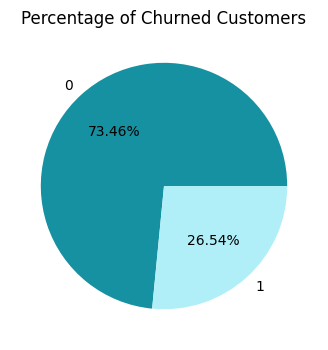

,Churn
Churn,
0,5174
1,1869


In [20]:
# Percentage of Churned Customers
colors = ["#1691A1", "#B1EFF8"]
plt.figure(figsize=(4,4))
gb=Telecom_Churn_Data.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb['Churn'], labels=gb.index,autopct="%1.2f%%",colors=colors)
plt.title("Percentage of Churned Customers")
plt.show()
gb

**This pie chart shows that 26.54% of customers have churned, while 73.46% remain retained, indicating a relatively stable customer base.**

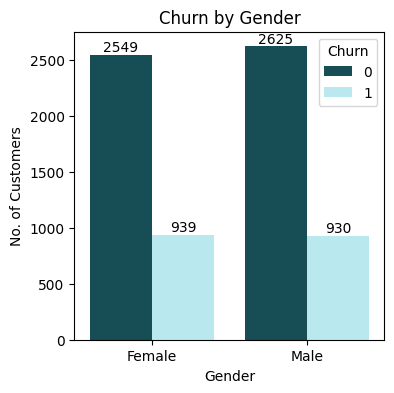

In [21]:
# Churn Distribution by Gender 
plt.figure(figsize=(4,4))
ax=sns.countplot(x='gender',data=Telecom_Churn_Data,hue='Churn',palette=["#0D555F","#B1EFF8"])

for bars in ax.containers:
    plt.bar_label(bars)
plt.title("Churn by Gender")
plt.xlabel('Gender')
plt.ylabel('No. of Customers')
plt.show()

**The chart shows that customer churn is similar between genders, with 939 females and 930 males churning, indicating no significant gender-based difference in churn rates.**

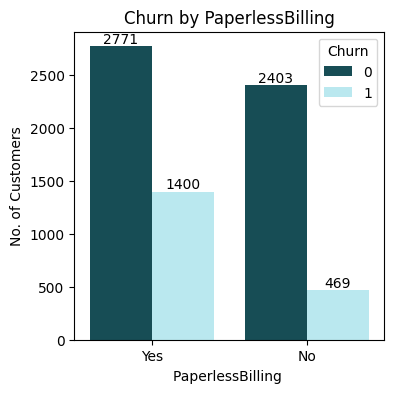

In [22]:
# Churn Distribution by PaperlessBilling   
plt.figure(figsize=(4,4))
ax=sns.countplot(x='PaperlessBilling',data=Telecom_Churn_Data,hue='Churn',palette=["#0D555F","#B1EFF8"])

for bars in ax.containers:
    plt.bar_label(bars)
plt.title("Churn by PaperlessBilling")
plt.xlabel('PaperlessBilling ')
plt.ylabel('No. of Customers')
plt.show()

**Customers with Paperless Billing have a significantly higher churn rate (33.55%) compared to those without it (16.32%), indicating a potential risk factor.**

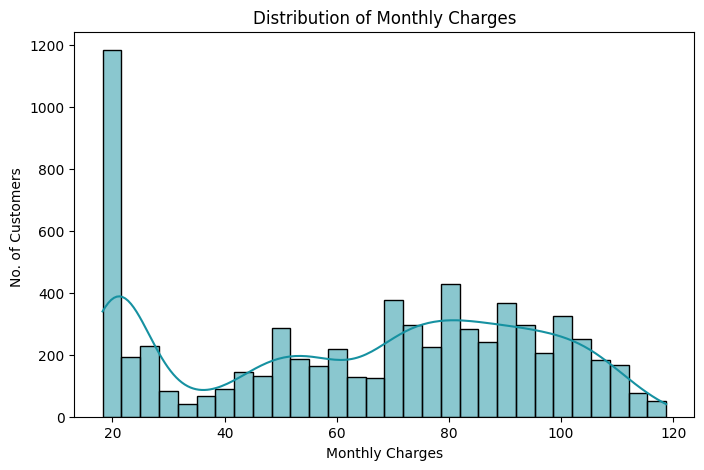

In [23]:
# Distribution of Monthly Charges  
plt.figure(figsize=(8, 5))
sns.histplot(Telecom_Churn_Data['MonthlyCharges'], bins=30, kde=True, color='#1691A1')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('No. of Customers ')
plt.show()

**The chart shows that a large number of customers have low monthly charges around $20, while the rest are more evenly distributed across higher charge ranges.**

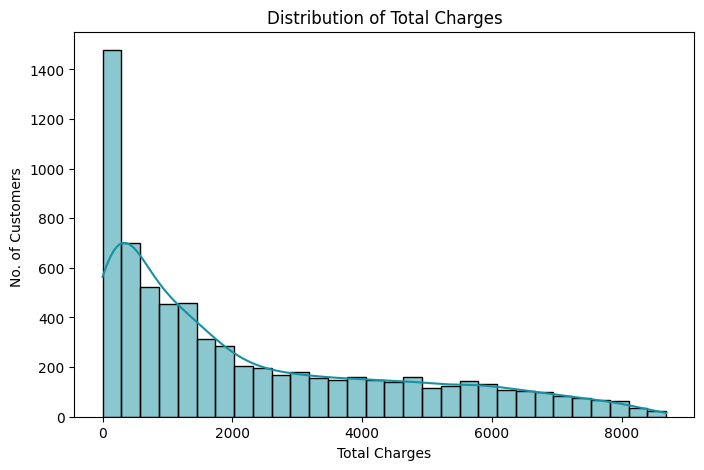

In [24]:
# Distribution of Total Charges  
plt.figure(figsize=(8, 5))
sns.histplot(Telecom_Churn_Data['TotalCharges'], bins=30, kde=True, color='#1691A1')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('No. of Customers ')
plt.show()

**The Total Charges distribution is right-skewed, indicating that most customers have lower total charges, with fewer customers having high cumulative costs.**

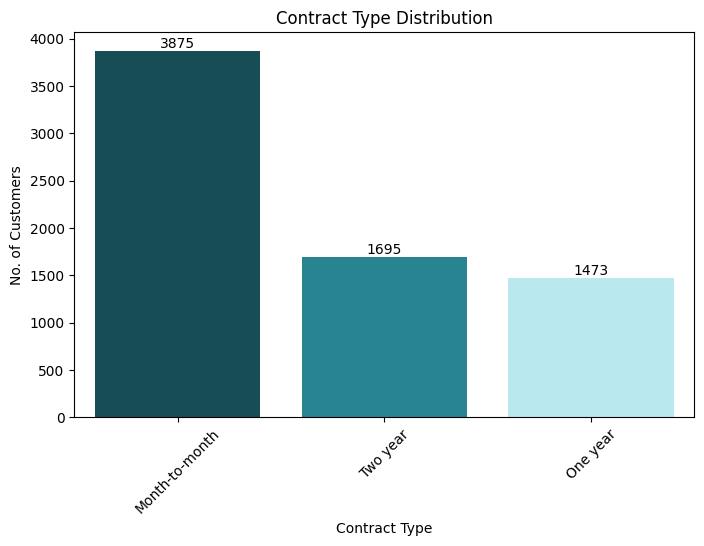

In [25]:
# Contract Type Distribution
custom_colors = ["#0D555F", "#1691A1", "#B1EFF8"]

sorted_contracts = Telecom_Churn_Data['Contract'].value_counts().index

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Contract', data=Telecom_Churn_Data, palette=custom_colors, order=sorted_contracts)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Contract Type Distribution')
plt.xlabel('Contract Type')
plt.ylabel('No. of Customers')
plt.xticks(rotation=45)
plt.show()

**The chart shows that most customers have month-to-month contracts, while fewer opt for one-year or two-year contracts, suggesting a preference for flexible agreements.**

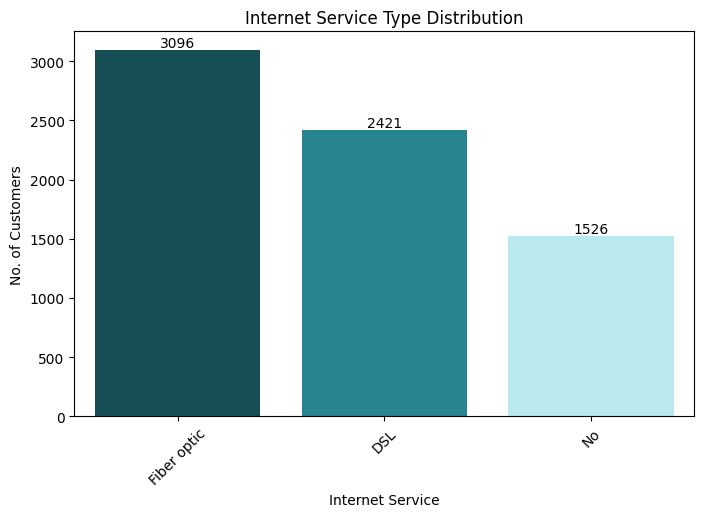

In [26]:
#Internet Service Type Distribution
custom_colors = ["#0D555F","#1691A1", "#B1EFF8"]
plt.figure(figsize=(8, 5))

sorted_service_type = Telecom_Churn_Data['InternetService'].value_counts().index

ax = sns.countplot(x='InternetService', data=Telecom_Churn_Data, palette=custom_colors, order=sorted_service_type)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Internet Service Type Distribution')
plt.xlabel('Internet Service')
plt.ylabel('No. of Customers')
plt.xticks(rotation=45)
plt.show()


**The chart shows that fiber optic is the most popular internet service, followed by DSL, while a smaller portion of customers have no internet service.**

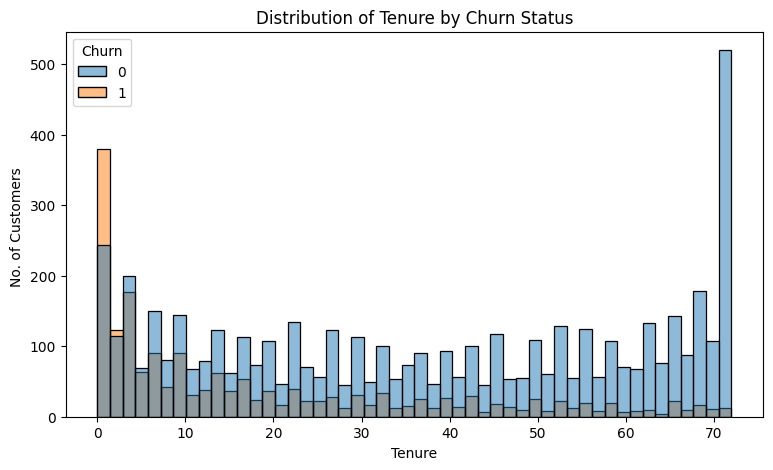

In [27]:
# Distribution of Tenure by Churn Status
plt.figure(figsize=(9,5))
sns.histplot(x='tenure',data=Telecom_Churn_Data,bins=50,hue="Churn")
plt.title("Distribution of Tenure by Churn Status")
plt.xlabel('Tenure')
plt.ylabel('No. of Customers ')
plt.show()

**The chart shows that customer churn is highest among those with very short tenure, while long-tenured customers tend to stay.**

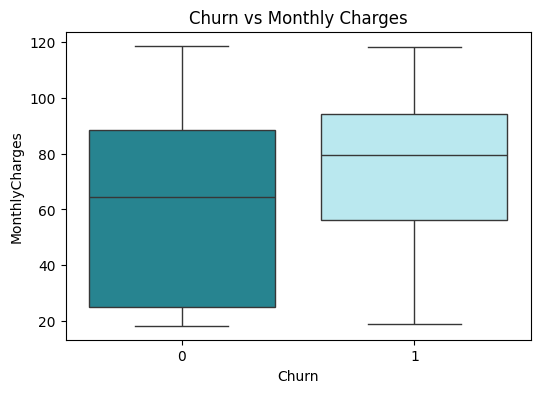

In [28]:
# Impact of Monthly Charges on Churn 
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=Telecom_Churn_Data, palette=["#1691A1", "#B1EFF8"])
plt.title('Churn vs Monthly Charges')
plt.show()

**The box plot shows that customers who churn tend to have higher median monthly charges compared to those who do not churn. The interquartile range (IQR) for churned customers is also higher, indicating more variability in their charges.**

**This suggests that higher monthly costs may be a contributing factor to customer churn.**

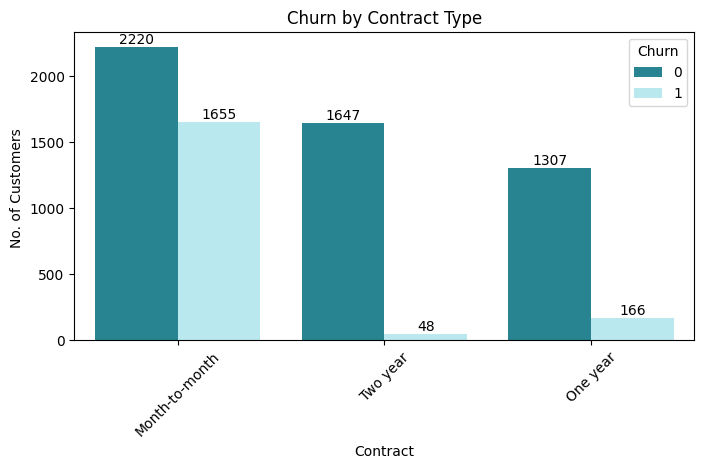

In [29]:
# Churn by Contract Type
plt.figure(figsize=(8,4))
sorted_contracts= Telecom_Churn_Data['Contract'].value_counts().index
ax=sns.countplot(x='Contract', hue='Churn', data=Telecom_Churn_Data, palette=["#1691A1", "#B1EFF8"],order=sorted_contracts)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Churn by Contract Type')
plt.xlabel('Contract')
plt.ylabel('No. of Customers ')
plt.xticks(rotation=45)
plt.show()


**Customers with month-to-month contracts have the highest churn rate, while those with one-year and two-year contracts are significantly less likely to churn.**

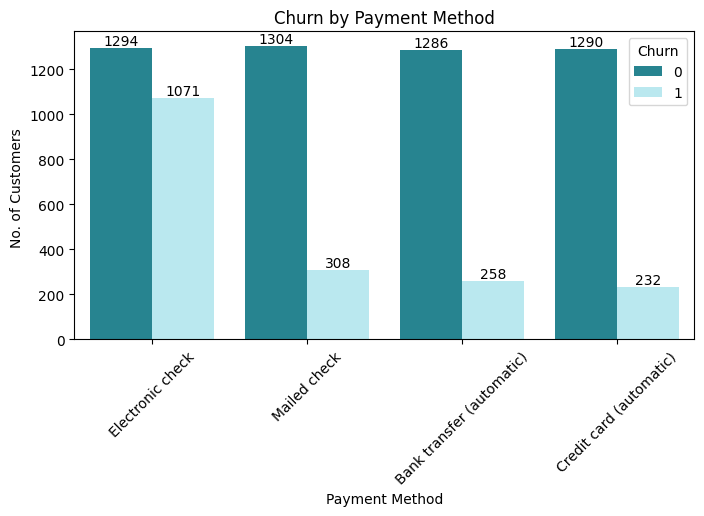

In [30]:
# Churn by Payment Method
plt.figure(figsize=(8,4))
ax=sns.countplot(x='PaymentMethod', hue='Churn', data=Telecom_Churn_Data, palette=["#1691A1", "#B1EFF8"])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('No. of Customers ')
plt.xticks(rotation=45)
plt.show()

**Customers using electronic checks have the highest churn rate, whereas those using automatic payment methods (bank transfer or credit card) are less likely to churn.**

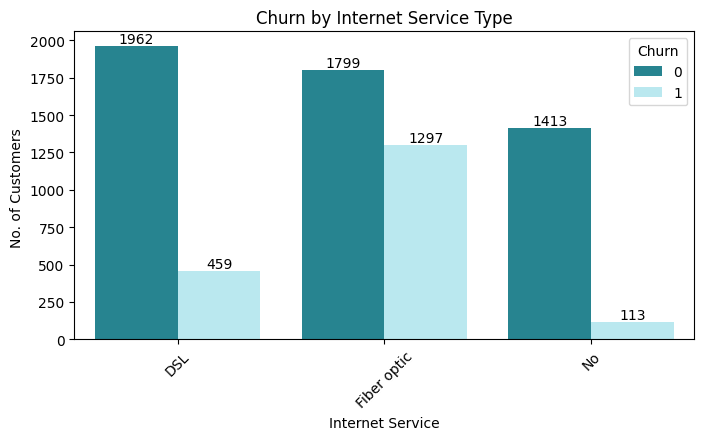

In [31]:
# Churn by Internet Service Type
plt.figure(figsize=(8,4))
ax=sns.countplot(x='InternetService', hue='Churn', data=Telecom_Churn_Data, palette=["#1691A1", "#B1EFF8"])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('No. of Customers ')
plt.xticks(rotation=45)
plt.show()

**Customers with fiber optic internet have the highest churn rate, while those without internet service have the lowest churn rate.**

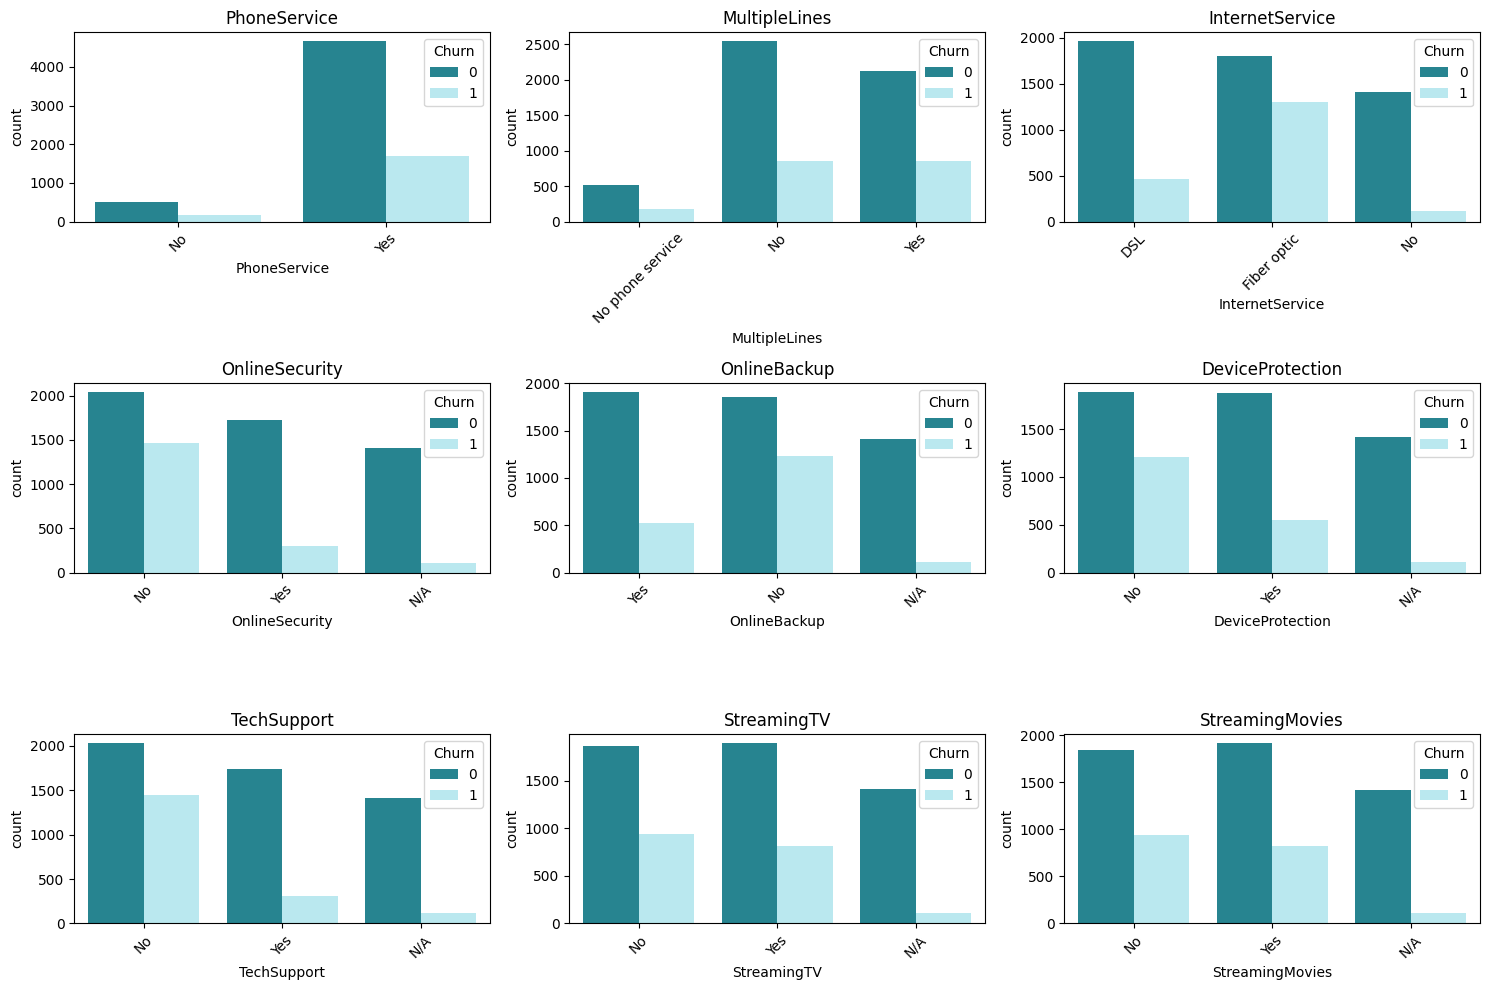

In [32]:
# Churn Distribution Across Different Service Categories
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
           'StreamingTV', 'StreamingMovies']
churn_palette = ["#1691A1", "#B1EFF8"]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10)) 

for i, column in enumerate(columns):
    row = i // 3  
    col = i % 3 
    sns.countplot(data=Telecom_Churn_Data, x=column, ax=axes[row, col],hue=Telecom_Churn_Data['Churn'],palette=churn_palette)
    axes[row, col].set_title(column)
    axes[row, col].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()

**Customers who do not use additional telecom services like Online Security, Tech Support, and Device Protection tend to have higher churn rates, indicating that these services may play a role in customer retention.** 

**Additionally, customers with fiber optic internet exhibit a higher churn rate compared to DSL or those without internet service, suggesting possible dissatisfaction with service quality or pricing.**

In [33]:
# Extracting Numerical Columns from the Dataset
numeric_df = Telecom_Churn_Data.select_dtypes(include=['int64', 'float64'])

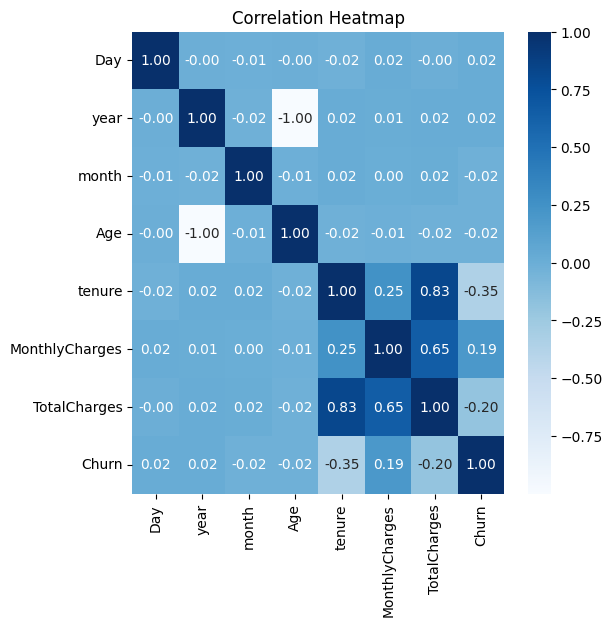

In [34]:
# Generating a Correlation Heatmap for Numerical Features
plt.figure(figsize=(6, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**The heatmap shows that long-term customers being less likely to churn and higher tenure leading to higher total charges. It also highlights weaker relationships where variables are not significantly correlated.**

## Conclusion

**-- Customers with month-to-month contracts and higher monthly charges show the highest churn rates, indicating price sensitivity.**


**-- Fiber optic internet users churn more compared to DSL or no internet service, suggesting potential dissatisfaction with pricing or service.**


**-- Long-term contracts and lower monthly charges significantly reduce churn, emphasizing the impact of contract stability on customer retention.**